# 프로젝트: 가위바위보 분류기 만들기

## 1. 필요한 모듈 import하기

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from PIL import Image
import os, glob

## 2. 데이터를 준비하자

### 2-1 데이터 만들기

(1) 구글의 teachable machine 사이트(https://teachablemachine.withgoogle.com/)에 접속한다.  
(2) 노트북 전면 카메라를 활용하여 가위, 바위, 보 이미지 각 100장을 만든다.  
(3) 나(100x3=300 jpg images)와 13명(13x100x3=3900 jpg images)의 이미지 압축파일을 다운로드 했다.  
(4) 압축파일을 unzip으로 해제하고, 각 폴더에서 이미지 파일 이외의 것은 제거하고 , png 이미지의 경우에 jpg 이미지로 확장자를 변경한다.   
(5) "가위" 이미지를 획득한 모양이 다른 사람의 데이터는 제외한다.  
(6) 각 사람별로 scissor, rock, paper 폴더에 있는 동일한 이름의 파일들을 하나의 scissor, rock, paper 폴더에 새로운 이름으로 저장한다.

### 2-2 데이터 불러오기 + Resize 하기

(5) 숫자 손글씨의 경우 이미지 크기가 28x28 이었기 때문에, 우리의 가위, 바위, 보 이미지도 28x28로 만들어야 합니다. 이를 위해서는 PIL 라이브러리를 사용해볼 거예요. 그러려면 먼저 라이브러리를 불러와야 겠죠?
혹시 PIL 라이브러리가 없는 경우 필요한 패키지를 설치해 주세요.

In [2]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_train/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)
# glob() 함수는 인자로 받은 패턴과 이름이 일치하는 모든 파일과 디렉터리의 리스트를 반환합니다. 
images = glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size = (28,28)
for img in images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img, "JPEG")
    

print("가위 이미지 개수:", len(os.listdir(image_dir_path)))
print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper_train/scissor
가위 이미지 개수: 1300
가위 이미지 resize 완료!


In [3]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME")+"/aiffel/rock_scissor_paper_train/rock"
print("이미지 디렉토리 경로:", image_dir_path)

images = glob.glob(image_dir_path + "/*.jpg")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size = (28, 28)
for img in images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img, "JPEG")
  
print("바위 이미지 개수:", len(os.listdir(image_dir_path)))
print("바위 이미지 resize 완료!")

이미지 디렉토리 경로: /home/aiffel/aiffel/rock_scissor_paper_train/rock
바위 이미지 개수: 1300
바위 이미지 resize 완료!


In [4]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME")+"/aiffel/rock_scissor_paper_train/paper"
print("이미지 디렉토리 경로:", image_dir_path)

images = glob.glob(image_dir_path + "/*.jpg")


# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size = (28, 28)
for img in images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img, "JPEG")

print("보 이미지 개수:", len(os.listdir(image_dir_path)))
print("보 이미지 resize 완료!")

이미지 디렉토리 경로: /home/aiffel/aiffel/rock_scissor_paper_train/paper
보 이미지 개수: 1300
보 이미지 resize 완료!


In [5]:
def load_data(img_path, num_imgs):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data = num_imgs   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size = 28
    color = 3
    
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs = np.zeros(number_of_data*img_size*img_size*color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path + '/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path + '/rock/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path + '/paper/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

train_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_train"

(x_train, y_train) = load_data(image_dir_path, 1300*3)
x_train_norm = x_train/255.0       # 입력은 0~1 사이의 값으로 정규화


print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 0 입니다.
x_train shape: (3900, 28, 28, 3)
y_train shape: (3900,)


### 2-3 데이터 이해하기

라벨:  0


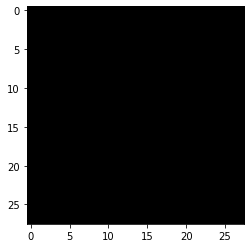

In [6]:
import matplotlib.pyplot as plt

plt.imshow(x_train_norm[0])
print('라벨: ', y_train[0])

### 2-4 train, validation, test 데이터 분리

#### train data : 다른 사람들의 데이터 1300 x 3 = 3900 images
#### test data : 나의 데이터 100 x 3 = 300 images

In [7]:
# from sklearn.model_selection import train_test_split

# X_train, X_valid, y_train, y_valid = train_test_split(x_train, 
#                                                     y_train, 
#                                                     valid_size=0.2, 
#                                                     random_state=7)

# print('X_train 개수: ', len(X_train), ', X_valid 개수: ', len(X_valid))

In [8]:
# from sklearn.cross_validation import train_test_split 

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [9]:
# train_size = 0.6
# validate_size = 0.2
# train, validate, test = np.split(my_data.sample(frac=1), [int(train_size * len(my_data)), int((validate_size + train_size) * len(my_data))])

## 3. 딥러닝 네트워크 (모델) 설계하기
자 이제 데이터의 준비가 끝났습니다. 이제 여러분들이 가위바위보를 인식하는 딥러닝 네트워크를 설계해 볼까요?

In [10]:
n_channel_1 = 32
n_channel_2 = 64
n_dense = 32
n_train_epoch = 10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                51232     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9

## 4. 딥러닝 네트워크 (모델) 학습시키기
잘 설계가 되었다면, 이제 학습을 시켜봅시다. 아마도 여러분들의 데이터는 거의 비슷비슷할 것이기 때문에 accuracy가 꽤 높게 나올 것입니다.

In [11]:
# 모델 학습 방식에 대한 환경설정
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Epoch 1/10
122/122 [==============================] - 1s 5ms/step - loss: 1.0589 - accuracy: 1.0000
Epoch 2/10
122/122 [==============================] - 1s 5ms/step - loss: 0.9102 - accuracy: 1.0000
Epoch 3/10
122/122 [==============================] - 1s 5ms/step - loss: 0.7810 - accuracy: 1.0000
Epoch 4/10
122/122 [==============================] - 1s 4ms/step - loss: 0.6700 - accuracy: 1.0000
Epoch 5/10
122/122 [==============================] - 1s 4ms/step - loss: 0.5757 - accuracy: 1.0000
Epoch 6/10
122/122 [==============================] - 1s 5ms/step - loss: 0.4961 - accuracy: 1.0000
Epoch 7/10
122/122 [==============================] - 1s 4ms/step - loss: 0.4290 - accuracy: 1.0000
Epoch 8/10
122/122 [==============================] - 1s 5ms/step - loss: 0.3726 - accuracy: 1.0000
Epoch 9/10
122/122 [==============================] - 1s 5ms/step - loss: 0.3251 - accuracy: 1.0000
Epoch 10/10
122/122 [==============================] - 1s 5ms/step - loss: 0.2851 - accuracy: 1.0000

## 5. 얼마나 잘 만들었는지 확인하기(테스트)
여러분들은 300장의 가위바위보 이미지를 만들어 모두 학습에 사용했습니다. 그러므로 테스트 데이터가 없죠. 옆 친구의 이미지 데이터 300장을 받아오세요. 그리고 그것을 테스트 데이터로 하여 test accuracy를 측정해보세요.

우선 테스트용 데이터인 x_test, y_test를 만들어 봅시다.

In [12]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
def load_data(img_path, num_imgs):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data = num_imgs   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size = 28
    color = 3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_test"
(x_test, y_test) = load_data(image_dir_path, 100*3)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


라벨:  0


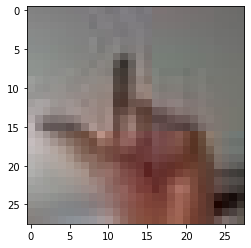

In [13]:
import matplotlib.pyplot as plt

plt.imshow(x_test_norm[1])
print('라벨: ', y_train[1])

In [14]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)

print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.4703 - accuracy: 0.3333
test_loss: 1.4702839851379395 
test_accuracy: 0.3333333432674408


## 6. 더 좋은 네트워크 만들어보기
시험용 데이터(x_test)에 대한 인식률(test accuracy)이 train accuracy보다 많이 낮게 나오지는 않았나요?
만약 그렇다면 그 이유는 무엇일까요? MNIST 손글씨 데이터 때처럼 test accuracy가 train accuracy에 근접하도록 개선 방법을 찾아 봅시다.

* 이미지를 섞지 않은 경우  
 -- 10/10 - 0s - loss: 2.0839 - accuracy: 0.3333

### 6-1 학습용과 검증용 데이터로 분할 및 셔플

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train_norm, y_train, test_size=0.2, random_state=1) 

In [16]:
# 모델 학습 방식에 대한 환경설정
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
98/98 [==============================] - 1s 5ms/step - loss: 0.2482 - accuracy: 1.0000
Epoch 2/10
98/98 [==============================] - 0s 4ms/step - loss: 0.2099 - accuracy: 1.0000
Epoch 3/10
98/98 [==============================] - 0s 4ms/step - loss: 0.1791 - accuracy: 1.0000
Epoch 4/10
98/98 [==============================] - 0s 5ms/step - loss: 0.1542 - accuracy: 1.0000
Epoch 5/10
98/98 [==============================] - 1s 5ms/step - loss: 0.1338 - accuracy: 1.0000
Epoch 6/10
98/98 [==============================] - 1s 5ms/step - loss: 0.1171 - accuracy: 1.0000
Epoch 7/10
98/98 [==============================] - 1s 5ms/step - loss: 0.1031 - accuracy: 1.0000
Epoch 8/10
98/98 [==============================] - 1s 5ms/step - loss: 0.0914 - accuracy: 1.0000
Epoch 9/10
98/98 [==============================] - 0s 5ms/step - loss: 0.0815 - accuracy: 1.0000
Epoch 10/10
98/98 [==============================] - 0s 5ms/step - loss: 0.0730 - accuracy: 1.0000


In [17]:
valid_loss, valid_accuracy = model.evaluate(x_valid, y_valid, verbose=2)

print("valid_loss: {} ".format(valid_loss))
print("valid_accuracy: {}".format(valid_accuracy))

25/25 - 0s - loss: 0.0674 - accuracy: 1.0000
valid_loss: 0.06740475445985794 
valid_accuracy: 1.0


In [18]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 16.5034 - accuracy: 0.3367
test_loss: 16.50341033935547 
test_accuracy: 0.33666667342185974


In [19]:
predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0.9270442  0.03808842 0.03486738]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


### 6-2 하이퍼파라미터 수정
* n_channel_1 = 32 --> 64
* n_channel_2 = 64 --> 128
* n_dense = 32 --> 32 + 64
* n_train_epoch = 10

In [20]:
n_channel_1 = 64
n_channel_2 = 128
n_dense = 32
n_train_epoch = 10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(n_dense*2, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                102432    
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [22]:
# 모델 학습 방식에 대한 환경설정
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
98/98 [==============================] - 1s 10ms/step - loss: 1.0666 - accuracy: 1.0000
Epoch 2/10
98/98 [==============================] - 1s 9ms/step - loss: 0.9448 - accuracy: 1.0000
Epoch 3/10
98/98 [==============================] - 1s 9ms/step - loss: 0.8357 - accuracy: 1.0000
Epoch 4/10
98/98 [==============================] - 1s 10ms/step - loss: 0.7388 - accuracy: 1.0000
Epoch 5/10
98/98 [==============================] - 1s 10ms/step - loss: 0.6533 - accuracy: 1.0000
Epoch 6/10
98/98 [==============================] - 1s 10ms/step - loss: 0.5785 - accuracy: 1.0000
Epoch 7/10
98/98 [==============================] - 1s 10ms/step - loss: 0.5131 - accuracy: 1.0000
Epoch 8/10
98/98 [==============================] - 1s 9ms/step - loss: 0.4561 - accuracy: 1.0000
Epoch 9/10
98/98 [==============================] - 1s 10ms/step - loss: 0.4065 - accuracy: 1.0000
Epoch 10/10
98/98 [==============================] - 1s 9ms/step - loss: 0.3634 - accuracy: 1.0000


In [23]:
valid_loss, valid_accuracy = model.evaluate(x_valid, y_valid, verbose=2)

print("valid_loss: {} ".format(valid_loss))
print("valid_accuracy: {}".format(valid_accuracy))

25/25 - 0s - loss: 0.3346 - accuracy: 1.0000
valid_loss: 0.33457672595977783 
valid_accuracy: 1.0


In [24]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 9.0041 - accuracy: 0.3333
test_loss: 9.00406551361084 
test_accuracy: 0.3333333432674408


## 학습하며 느낀점
* 데이터 전처리의 중요성을 알게 되었다.
* 좋은 학습 데이터를 준비하기 위해서는 데이터 전처리 이전에 데이터 획득과정부터 고민해야 될것 같다.
* 평가용의 정확도 값이 1로 나온 것은 동영상으로 이미지를 캡쳐하다보니 학습용 데이터에도 평가용 데이터와 동일한 것이 있었기 때문이라 생각된다.
* 테스트 데이터의 정확도가 0.3333 으로 나왔다는 것은 모델이 랜덤으로 선택하는 경우와 같기 때문에 학습이 제대로 이루어지지 않았다고 할수 있다.